<html>
<head>
<meta content="text/html; charset=ISO-8859-1"
http-equiv="content-type">
<title></title>
</head>
<body>
<p style="text-align: center;" class="MsoNormal"><span
style="font-weight: bold; text-decoration: underline;">OpenCV 101: A
Practical Guide to the Open Computer Vision
Library</span></p>
<p style="text-align: center;" class="MsoNormal"><img alt="OpenCV"
src="https://a.fsdn.com/allura/p/opencvlibrary/icon"><br>
<span style="font-weight: bold; text-decoration: underline;"></span><o:p></o:p></p>
<p class="MsoNormal"><br>
<o:p></o:p></p>
<p style="text-align: center;" class="MsoNormal">CASIS Short Course<o:p></o:p></p>
<p style="text-align: center;" class="MsoNormal"><o:p>&nbsp;<span
style="font-weight: bold; text-decoration: underline;">Session 3</span><br>
</o:p></p>
<p style="text-align: center;" class="MsoNormal"><span
style="font-style: italic;">Matthew Rever, LLNL<br>
<br>
rever1@llnl.gov</span><o:p></o:p></p>
<br>
<p class="MsoNormal"><o:p></o:p></p>
<!--/.row--> <br>
<div class="row">
<div class="span8 well pull-left"
style="padding: 0.7em 0.7em 0.5em; overflow: hidden;">
<div class="span4">
<h5 style="margin-top: 0pt;">
<p>Sponsored by:</p>
<p><a href="https://www-eng.llnl.gov/">LLNL Engineering Directorate</a></p>
<p><a href="https://casis.llnl.gov/">Center for Advanced Signal &amp;
Image <br>
Sciences (CASIS)</a></p>
</h5>
</div>
<div class="span4 pull-right" style="margin-left: 0px;">
<h5 style="margin-top: 0pt;">
<p>This technical event is jointly <br>
sponsored by:</p>
<a href="http://www.e-grid.net"><img
src="https://casis.llnl.gov/casis_2012/images/ieee_blue.gif" alt="IEEE"
style="border: 1px outset rgb(221, 221, 221); padding: 5px; float: right; margin-right: 10px; background-color: white;"></a>
<a href="http://www.ewh.ieee.org/r6/oeb/SigProc/sigproc.html">Oakland-East
Bay Chapter of the IEEE Signal Processing Society</a> </h5>
</div>
</div>
</div>
<!--/.row Sponsor Div-->
<p>&nbsp;</p>
This work performed under the auspices of the U.S. Department of Energy
by Lawrence Livermore National Laboratory under Contract
DE-AC52-07NA27344
<br>
<br>
LLNL-PRES-700980
</body>
</html>



<br><br><br><br><br><br><br><br><br><br>Image Segmentation

What is image segmentation?

Partitioning an image into regions of interest (example: in a picture of a human face, finding
which pixels are the human and which are the background)

Goal:  Try to find boundaries around related/similar (in color, texture etc) pixels

In [1]:
%pylab notebook
import cv2
%cd data

Populating the interactive namespace from numpy and matplotlib
C:\Users\mrever\Documents\cvcourse\final\CASIS-OpenCV-Course\data


<b>Watershed algorithm</b>
<br>
http://cmm.ensmp.fr/~beucher/wtshed.html
<br>
<img src="http://cmm.ensmp.fr/~beucher/lpe1.gif">

<IPython.core.display.Javascript object>


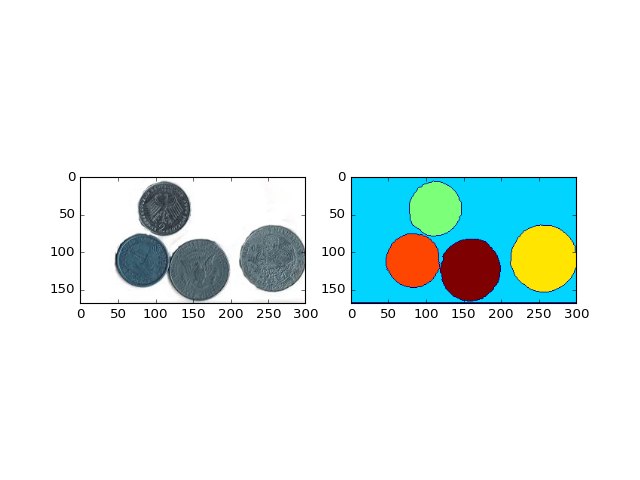

In [2]:
img = cv2.imread('coinsb.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)


# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
# img[markers == -1] = [255,0,0]

figure()
subplot(1,2,1)
imshow(img)
subplot(1,2,2)
imshow(markers)


<b>Grab-cut</b>
<br>
Graph-theory based algorithm to segment image with minimal user interaction<br>
http://docs.opencv.org/3.1.0/d8/d83/tutorial_py_grabcut.html
<br>
Paper: http://dl.acm.org/citation.cfm?id=1015720

<IPython.core.display.Javascript object>


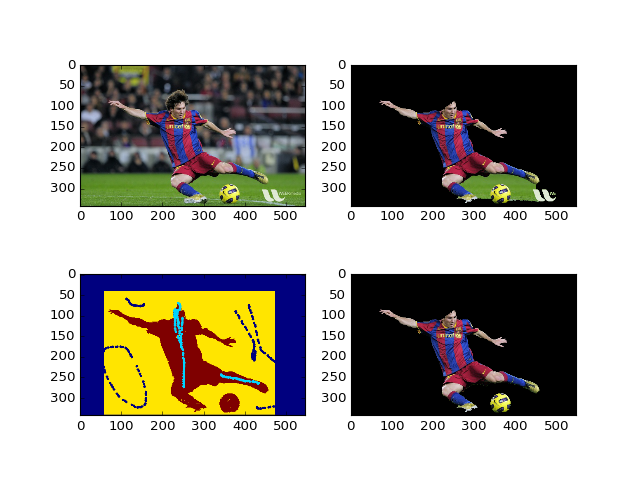

In [3]:
#Grab-cut demo
img = imread('messi5.jpg')
orig = img.copy()
mask = zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,50,450,290)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
img_interm = img.copy()

newmask = cv2.imread('messimask.png',0) #I generated this file using a modified version of grabcut.py included
                                        #in the OpenCV samples repository


mask=newmask

mask, bgdModel, fgdModel = cv2.grabCut(img,mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)

mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask[:,:,np.newaxis]


figure()
subplot(2,2,1)
imshow(orig)
subplot(2,2,2)
imshow(img_interm)
subplot(2,2,3)
imshow(newmask)
subplot(2,2,4)
imshow(img)

In [124]:
%run ../python/grabcut.py messi5.jpg


Interactive Image Segmentation using GrabCut algorithm.

This sample shows interactive image segmentation using grabcut algorithm.

USAGE:
    python grabcut.py <filename>

README FIRST:
    Two windows will show up, one for input and one for output.

    At first, in input window, draw a rectangle around the object using
mouse right button. Then press 'n' to segment the object (once or a few times)
For any finer touch-ups, you can press any of the keys below and draw lines on
the areas you want. Then again press 'n' for updating the output.

Key '0' - To select areas of sure background
Key '1' - To select areas of sure foreground
Key '2' - To select areas of probable background
Key '3' - To select areas of probable foreground

Key 'n' - To update the segmentation
Key 'r' - To reset the setup
Key 's' - To save the results

 Instructions: 

 Draw a rectangle around the object using right mouse button 

first draw rectangle 

 Now press the key 'n' a few times until no further change 



<br><br><br>Exercise:  Histogram backprojection is another powerful segmentation tool.  Read this and play with the code:
http://docs.opencv.org/3.1.0/dc/df6/tutorial_py_histogram_backprojection.html

<br><br><br>Image Transformations

<b>Resizing</b>

<IPython.core.display.Javascript object>


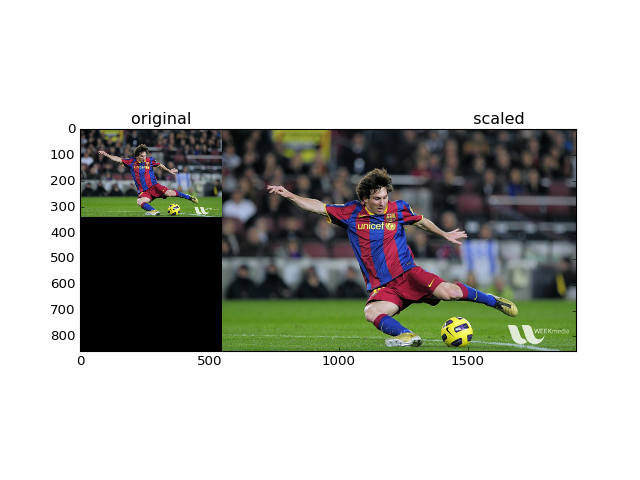

In [4]:
scalefactor=2.5

img = imread('messi5.jpg')

#the heart of the code:
res = cv2.resize(img,None,fx=scalefactor, fy=scalefactor, interpolation = cv2.INTER_CUBIC)

#the remainder of the code is to generate the display image
height, width = img.shape[:2]

bigwidth = int( amax( [scalefactor*height , height]) )
bigheight = int( width*(1+scalefactor))

bigim = zeros((bigwidth , bigheight ,3),uint8)
bigim[:height,:width] = img

if scalefactor > 1:
    bigim[:,width:] = res
else:
    bigim[: int(scalefactor*height),width:] = res

figure()
imshow(bigim)
title('original                                                       scaled')


<br><br><b>Translation</b>

<IPython.core.display.Javascript object>


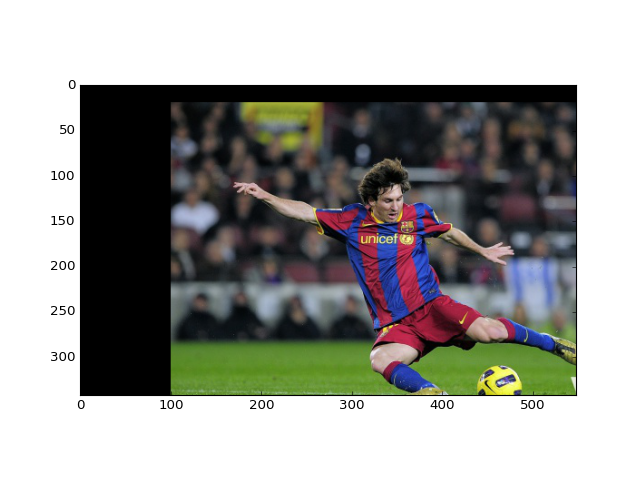

In [5]:

img = imread('messi5.jpg')
rows,cols,chans = img.shape

xshift=100
yshift=20

M = np.float32([[1,0,xshift],[0,1,yshift]])
dst = cv2.warpAffine(img,M,(cols,rows))

figure()
imshow(dst)


<br><br><b>Rotation</br>
<br>
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/math/8ce4826052a5887bbcae39f3549d07aecadf3e65.png">

<IPython.core.display.Javascript object>


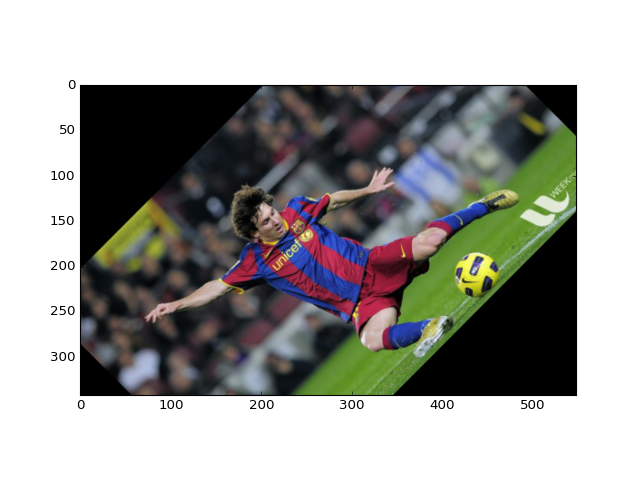

In [6]:
img = imread('messi5.jpg')
rows,cols, chans = img.shape

#specify our rotation in degrees
theta = 45.0

M = cv2.getRotationMatrix2D((cols/2,rows/2),theta,1) 
dst = cv2.warpAffine(img,M,(cols,rows))
                 
figure()
imshow(dst)                 


<br><br><b>General affine transform:</b><br><br>
Map 3 input (x,y) points to 3 output points
ie parallelogram to parallelogram
Will perform translation, scaling, rotation, and skew, but not perspective correction

<IPython.core.display.Javascript object>


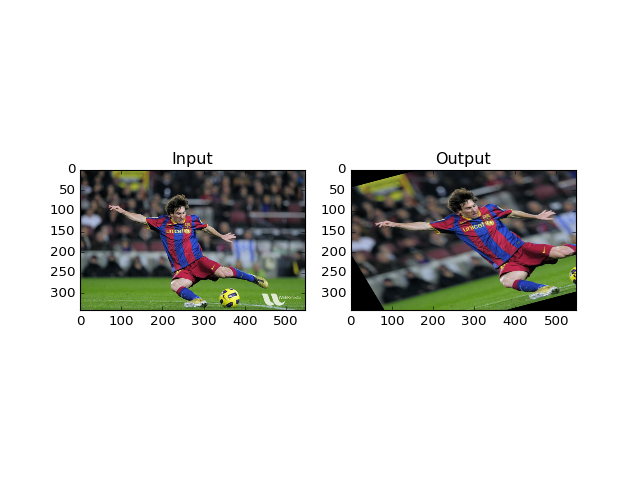

(<matplotlib.axes._subplots.AxesSubplot at 0x12906c1c7b8>,
 <matplotlib.text.Text at 0x1290a07d438>)

In [7]:
img = imread('messi5.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

figure()
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')



<br><br><b>Perspective transform:</b><br><br>
4 point transform
<br>Nonlinear but more general than affine
<br>Perspective:  further away objects look smaller

<IPython.core.display.Javascript object>


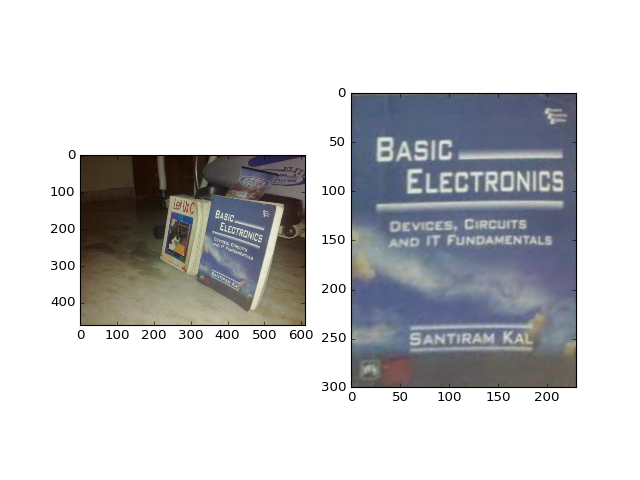

In [8]:
img = imread('right.jpg')
rows,cols,chans = img.shape

startpts =  float32([[362, 107], [530,139] , [453,416], [319,337]])
endpts   =  float32([[100, 100], [330,100],  [330,400], [100,400]])

M = cv2.getPerspectiveTransform(startpts,endpts)

dst = cv2.warpPerspective(img,M,(rows,cols))

figure()
subplot(1,2,1)
imshow(img)
subplot(1,2,2)
imshow(dst[100:400,100:330])


<br><br><br>Finding objects

Template matching:
    
    Use an example (template) image (smaller than main image), slide it over the main image, and see where the correlation is strongest
    
    Can be used to determine if an object is present, and if so, where

<IPython.core.display.Javascript object>


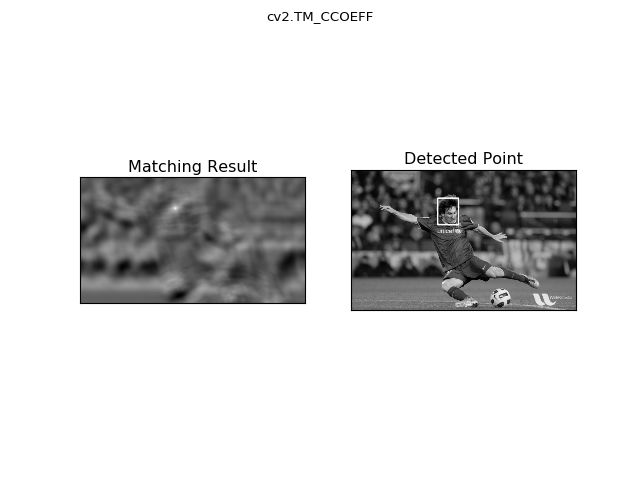

<IPython.core.display.Javascript object>


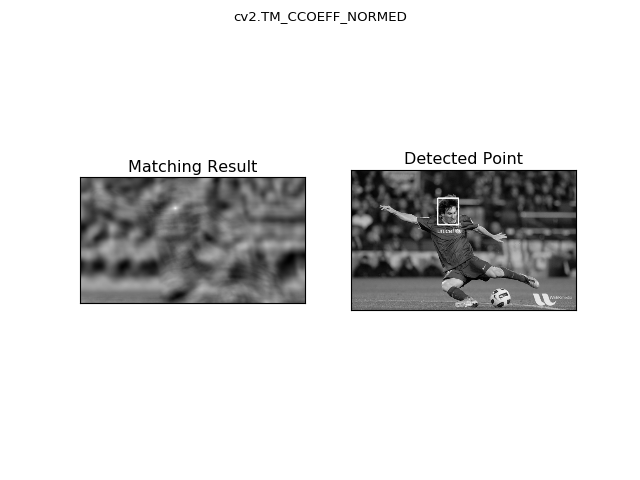

<IPython.core.display.Javascript object>


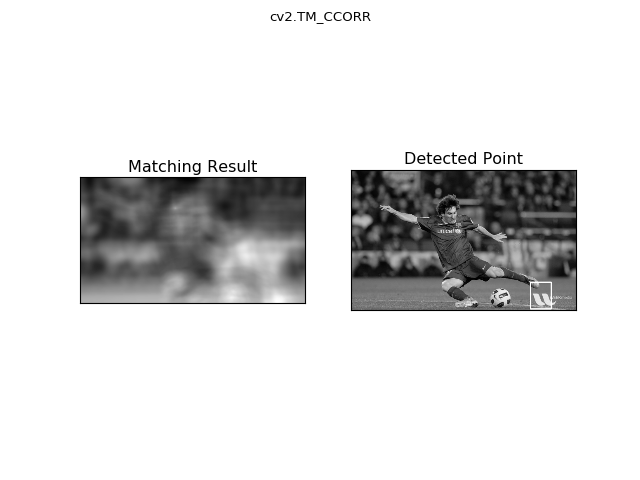

<IPython.core.display.Javascript object>


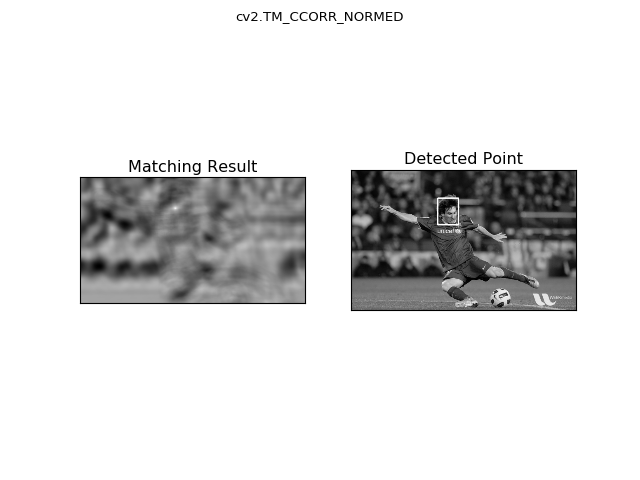

<IPython.core.display.Javascript object>


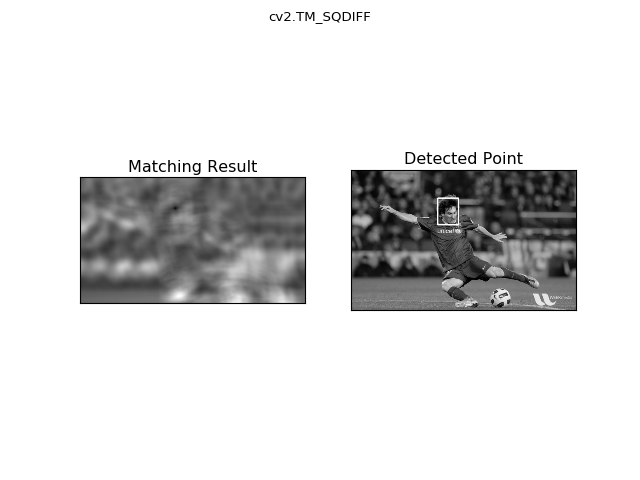

<IPython.core.display.Javascript object>


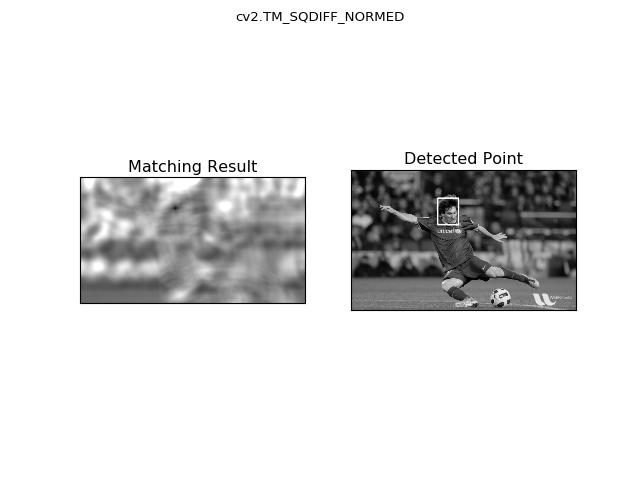

In [9]:
#template example with various cross-correlation metrics

img = cv2.imread('messi5.jpg',0)
img2 = img.copy()
template = img[70:135,210:260]
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    figure()
    subplot(121)
    imshow(res,cmap = 'gray')
    title('Matching Result')
    xticks([])
    yticks([])
    subplot(122),
    imshow(img,cmap = 'gray')
    title('Detected Point')
    xticks([])
    yticks([])
    suptitle(meth)


<br><br><br>Finding lines and circles with the Hough Transform

Hough transform: Take an edge-detection, binarized image;<br>
Consider curves which can be parameterized (lines, for example, have angle and offset parameters);<br>
For a given set of parameters, see how many points in the image fall on the curve<br>
If #points > threshold, that curve exists in the image<br>
http://docs.opencv.org/3.1.0/d6/d10/tutorial_py_houghlines.html


<img src="http://docs.opencv.org/3.1.0/houghlinesdemo.gif">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1c/Hough-example-result-en.png/800px-Hough-example-result-en.png">

<IPython.core.display.Javascript object>


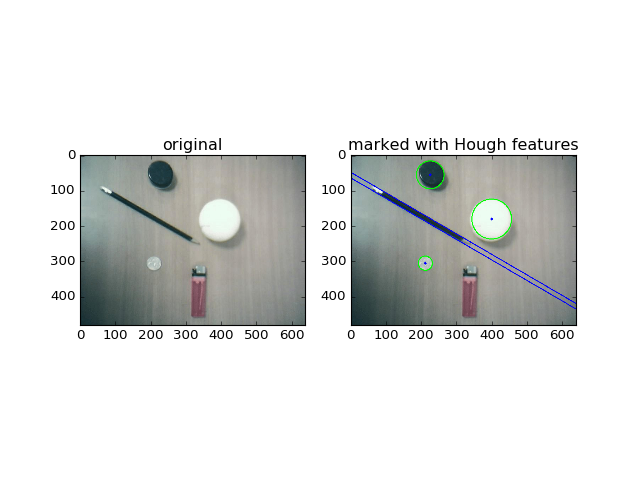

In [10]:
#Hough line and circle example

img = imread('stuff.jpg')
imgorg = img.copy()
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

#heart of the code:
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,2*pi/180,100)

circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,1,200, param1=150,param2=30,minRadius=0,maxRadius=0)


#the rest of the code is for display
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
    
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)


figure()
subplot(1,2,1)
title('original')
imshow(imgorg)
subplot(1,2,2)
imshow(img)
title('marked with Hough features')


Suggested exercise:

Write a script that takes in a well-behaved (non-overlapping) image of spare change (pennies, nickles, dimes, quarters etc) and outputs the amount of money present.

Sample image:
<img src="http://datagenetics.com/blog/december42012/all.png">

https://encrypted-tbn3.gstatic.com/images?q=tbn:ANd9GcS53fqghnDXC3iJc4e5jIHyWvELTaXd1m2l2-AjsCJ9P1-vWNQ2

https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcTU0mpGPO96fKfLSnzJyJzdJX6Mckhid-DPHh6PEvpTrtgGOQm68l50A2s

If you're feeling ambitious, make it work with images captured at an angle.



<br><br><br>Features

What are image features?
<br>
"specific patterns or specific features which are unique, which can be easily tracked, which can be easily compared."<br>
http://docs.opencv.org/3.1.0/df/d54/tutorial_py_features_meaning.html

<b>Corners:</b>
<br>Algorithms exist to find corner points in images
<br>Very handy for objects with sharp edges


<IPython.core.display.Javascript object>


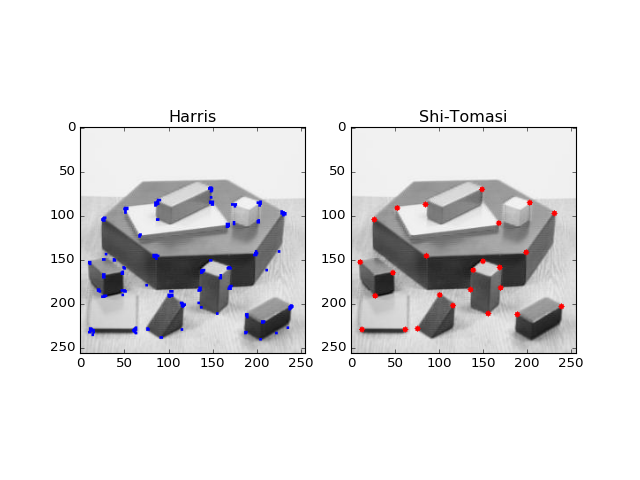

In [11]:
img = imread('blox.jpg')
img2 = img.copy()
gray = float32(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))


#######Method 1: Harris corners
dst = cv2.cornerHarris(gray,2,3,0.04)
#display code
dst = cv2.dilate(dst,None)
img[dst>0.01*dst.max()]=[0,0,255]
#####################



#######Method 2 Shi-Tomasi corners, AKA "good features to track"
corners = int0(cv2.goodFeaturesToTrack(gray,25,0.01,10))
#display code
for i in corners:
    x,y = i.ravel()
    cv2.circle(img2,(x,y),3,255,-1)
###################



figure()
subplot(121)
title('Harris')
imshow(img)
subplot(122)
title('Shi-Tomasi')
imshow(img2)

Suggested exercise:<br>
Find or create an image that contains a rectangular object captured at an angle against a flat, high-contrast background.  Write a script that finds the corners and then performs a perspective transform to bring the object into head-on view.

<b>Widely used general features:</b><br>
<br>SIFT: Scale Invariant Feature Transfrom
<br>SURF: Speeded Up Robust Features
<br>BRISK: Binary Robust Invariant Scalable Keypoints
<br>HOG: Histogram of oriented Gradients
<br>BRIEF: Binary Robust Independent Elementary Features
<br>ORB: Oriented fast and Rotated BRIEF
<br>AKAZE: AKAZE (no acronym)

<br>Exercise:  Read about these different features on Wikipedia and http://docs.opencv.org/3.1.0/db/d27/tutorial_py_table_of_contents_feature2d.html

<br><br><br>Feature-matching/homography demo

<IPython.core.display.Javascript object>


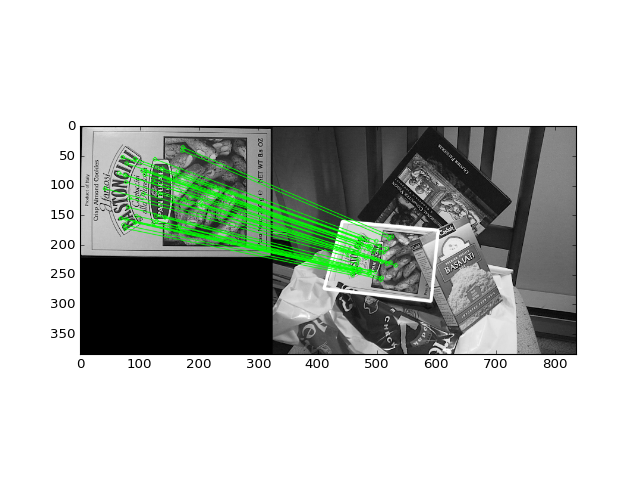

In [12]:
MIN_MATCH_COUNT = 10 #make sure we have at least 10 points to compare/match

img1 = cv2.imread('box.png',0)          # query image
img2 = cv2.imread('box_in_scene.png',0) # main image

# Initiate  detector

###uncomment one of these
# detector = cv2.xfeatures2d.SIFT_create(); norm = cv2.NORM_L2

# detector = cv2.xfeatures2d.SURF_create(800); norm = cv2.NORM_L2

# detector = cv2.ORB_create(400); norm = cv2.NORM_HAMMING

# detector = cv2.AKAZE_create(); norm = cv2.NORM_HAMMING

detector = cv2.BRISK_create(); norm = cv2.NORM_HAMMING


# find the keypoints and descriptors with chosen detector
kp1, des1 = detector.detectAndCompute(img1,None)
kp2, des2 = detector.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

#we've found the points, now we need to find matching pairs
matcher =  cv2.BFMatcher(norm) #BF = brute force
#Flann matcher can be more efficient but also more tempermental

#find the matches
matches = matcher.knnMatch(des1,trainDescriptors=des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None


draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

figure()
imshow(img3, 'gray')


In [ ]:
%run ../python/find_obj.py